Download rent data

In [2]:
import requests
import os, os.path, csv
import pandas as pd
import numpy as np
df_rent=pd.read_csv("/home/jovyan/demo/median rent.csv")
df_rent.head()

areaName    Borough   areaType  2010-01  2010-02  2010-03  \
0         All Downtown  Manhattan  submarket   3200.0   3200.0   3025.0   
1          All Midtown  Manhattan  submarket   2895.0   2800.0   2800.0   
2  All Upper East Side  Manhattan  submarket   2469.0   2450.0   2400.0   
3  All Upper Manhattan  Manhattan  submarket   1825.0   1800.0   1795.0   
4  All Upper West Side  Manhattan  submarket   2895.0   2800.0   2750.0   

   2010-04  2010-05  2010-06  2010-07  ...  2018-07  2018-08  2018-09  \
0   3100.0   3100.0   3200.0   3195.0  ...   3800.0   3800.0   3831.0   
1   2850.0   2900.0   2950.0   3000.0  ...   3503.0   3500.0   3518.0   
2   2500.0   2550.0   2550.0   2595.0  ...   2910.0   2900.0   2895.0   
3   1800.0   1823.0   1850.0   1875.0  ...   2430.0   2400.0   2350.0   
4   2800.0   2798.0   2795.0   2800.0  ...   3345.0   3324.0   3400.0   

   2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  2019-04  
0   3800.0   3876.0   3800.0   3800.0   3895.0   3800.0   3965.0  
1   3550.0   3533.0   3575.0   3500.0   3559.0   3554.0   3600.0  
2   2995.0   2995.0   3000.0   3000.0   3000.0   2995.0   2995.0  
3   2350.0   2300.0   2300.0   2300.0   2337.0   2383.0   2400.0  
4   3400.0   3395.0   3400.0   3400.0   3375.0   3400.0   3500.0  

[5 rows x 115 columns]

To make sure the rent data is reflecting the location data, only the rent prices from the last year were kept.

Moreover, the first 6 rows are summary data for all regions, which will be removed.



In [3]:
df_rent=df_rent[df_rent["areaType"]=="neighborhood"].reset_index()
cols = [np.array(tuple(range(4,104)))]
df_rent.drop(df_rent.columns[cols],axis=1,inplace=True)
df_rent.drop(df_rent.columns[0],axis=1,inplace=True)
df_rent.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


areaName    Borough      areaType  2018-05  2018-06  2018-07  \
0            Astoria     Queens  neighborhood   2200.0   2200.0   2223.0   
1         Auburndale     Queens  neighborhood   1850.0   2098.0   2095.0   
2         Bath Beach   Brooklyn  neighborhood   2000.0   1850.0   1700.0   
3  Battery Park City  Manhattan  neighborhood   4650.0   4525.0   4750.0   
4          Bay Ridge   Brooklyn  neighborhood   1950.0   1950.0   1850.0   

   2018-08  2018-09  2018-10  2018-11  2018-12  2019-01  2019-02  2019-03  \
0   2250.0   2250.0   2200.0   2150.0   2150.0   2195.0   2199.0   2200.0   
1   2000.0   1895.0   1995.0   1995.0   1900.0   2045.0   2045.0   1995.0   
2   1675.0   1675.0   1750.0   1725.0   1675.0   1700.0   1575.0   1695.0   
3   4854.0   4995.0   4874.0   4500.0   4350.0   4415.0   4500.0   4320.0   
4   1995.0   2000.0   2000.0   1980.0   1900.0   1900.0   1999.0   2000.0   

   2019-04  
0   2200.0  
1   1998.0  
2   1680.0  
3   4493.0  
4   1975.0

Then, the means of the median rent price for the last year are calculated for each neighborhood.
The neighborhoods with missing data ar ignored.

In [4]:
df_mean=df_rent.iloc[:,3:].mean(axis=1, skipna=True, level=None, numeric_only=None)
df_mean
df_rent_new=df_rent.iloc[:,0:3]
df_rent_new['mean'] = pd.Series(df_mean)
df_rent_new.dropna(axis=0, how='any', inplace=True)
df_rent_new=df_rent_new.reset_index(drop=True)

Next, obtain the coordinate data for each neighborhood.
First, install all related packages.

In [5]:
!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py37_1         149 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geogra

Import related libraries

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Import new york coordinate data


In [7]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods_data = newyork_data['features']
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
neighborhoods    

Data downloaded!


Borough               Neighborhood   Latitude  Longitude
0            Bronx                  Wakefield  40.894705 -73.847201
1            Bronx                 Co-op City  40.874294 -73.829939
2            Bronx                Eastchester  40.887556 -73.827806
3            Bronx                  Fieldston  40.895437 -73.905643
4            Bronx                  Riverdale  40.890834 -73.912585
5            Bronx                Kingsbridge  40.881687 -73.902818
6        Manhattan                Marble Hill  40.876551 -73.910660
7            Bronx                   Woodlawn  40.898273 -73.867315
8            Bronx                    Norwood  40.877224 -73.879391
9            Bronx             Williamsbridge  40.881039 -73.857446
10           Bronx                 Baychester  40.866858 -73.835798
11           Bronx             Pelham Parkway  40.857413 -73.854756
12           Bronx                City Island  40.847247 -73.786488
13           Bronx               Bedford Park  40.870185 -73.885512
14           Bronx         University Heights  40.855727 -73.910416
15           Bronx             Morris Heights  40.847898 -73.919672
16           Bronx                    Fordham  40.860997 -73.896427
17           Bronx               East Tremont  40.842696 -73.887356
18           Bronx                 West Farms  40.839475 -73.877745
19           Bronx               High  Bridge  40.836623 -73.926102
20           Bronx                    Melrose  40.819754 -73.909422
21           Bronx                 Mott Haven  40.806239 -73.916100
22           Bronx                Port Morris  40.801664 -73.913221
23           Bronx                   Longwood  40.815099 -73.895788
24           Bronx                Hunts Point  40.809730 -73.883315
25           Bronx                 Morrisania  40.823592 -73.901506
26           Bronx                  Soundview  40.821012 -73.865746
27           Bronx               Clason Point  40.806551 -73.854144
28           Bronx                Throgs Neck  40.815109 -73.816350
29           Bronx               Country Club  40.844246 -73.824099
30           Bronx                Parkchester  40.837938 -73.856003
31           Bronx         Westchester Square  40.840619 -73.842194
32           Bronx                   Van Nest  40.843608 -73.866299
33           Bronx                Morris Park  40.847549 -73.850402
34           Bronx                    Belmont  40.857277 -73.888452
35           Bronx             Spuyten Duyvil  40.881395 -73.917190
36           Bronx            North Riverdale  40.908543 -73.904531
37           Bronx                 Pelham Bay  40.850641 -73.832074
38           Bronx              Schuylerville  40.826580 -73.826203
39           Bronx             Edgewater Park  40.821986 -73.813885
40           Bronx                Castle Hill  40.819014 -73.848027
41           Bronx                  Olinville  40.871371 -73.863324
42           Bronx             Pelham Gardens  40.862966 -73.841612
43           Bronx                  Concourse  40.834284 -73.915589
44           Bronx                  Unionport  40.829774 -73.850535
45           Bronx                   Edenwald  40.884561 -73.848083
46        Brooklyn                  Bay Ridge  40.625801 -74.030621
47        Brooklyn                Bensonhurst  40.611009 -73.995180
48        Brooklyn                Sunset Park  40.645103 -74.010316
49        Brooklyn                 Greenpoint  40.730201 -73.954241
50        Brooklyn                  Gravesend  40.595260 -73.973471
51        Brooklyn             Brighton Beach  40.576825 -73.965094
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438
54        Brooklyn                   Flatbush  40.636326 -73.958401
55        Brooklyn              Crown Heights  40.670829 -73.943291
56        Brooklyn              East Flatbush  40.641718 -73.936103
57        Brooklyn                 Kensington  40.642382 -73.980421

Let us drop all neighborhood which are not included in the rent dataset.

While working on this step, I found there is a neighborhood called Bronxwood which is part of Allerton neighborhood, along with Laconia. Considering Laconia has missing rent information, the neighborhood Bronxwood will be considered as Allerton.

In [9]:
n_list=[]
n=-1
Latitude=[]
Longitude=[]
for nh in df_rent_new["areaName"]:
 n=n+1
 if nh=="Bronxwood":
    nh="Allerton"
 if nh=="Jamaica":
    nh="Jamaica Center"   
 if nh=="DUMBO":
    nh="Dumbo"  
 if nh=="Downtown Brooklyn":
    nh="Downtown"   
 if nh=="Gramercy Park":
    nh="Gramercy"  
 if nh=="Greenwood":
    nh="Green-Wood Cemetery, NY"
 if nh=="Stuyvesant Town/PCV":
    nh="Stuyvesant Town"
 if nh=="Bedford-Stuyvesant":
    nh="Bedford Stuyvesant"

 #if nh=='Central Park South'or nh=='Columbia St Waterfront District'or nh== 'Crotona Park East':
 #   continue
 try:   
  temp=neighborhoods.index[neighborhoods['Neighborhood'] == nh]
 
  Latitude.append(neighborhoods["Latitude"][temp[0]])
  Longitude.append(neighborhoods["Longitude"][temp[0]])
 except:
    try:
       address =  nh+","+df_rent_new.loc[n,"Borough"]+",NY"
       geolocator = Nominatim(user_agent="ny_explorer")
       location = geolocator.geocode(address)
       Latitude.append(location[1][0])
       Longitude.append(location[1][1])
    except:    
        print(nh)
        print(n)
    

visualize the latitude and longitude of all neighborhoods

In [10]:
df_rent_new['Latitude'] = pd.Series(Latitude)
df_rent_new['Longitude'] = pd.Series(Longitude)
df_rent_new

areaName    Borough      areaType         mean  \
0                            Astoria     Queens  neighborhood  2201.416667   
1                         Auburndale     Queens  neighborhood  1992.583333   
2                         Bath Beach   Brooklyn  neighborhood  1725.000000   
3                  Battery Park City  Manhattan  neighborhood  4602.166667   
4                          Bay Ridge   Brooklyn  neighborhood  1958.250000   
5                            Bayside     Queens  neighborhood  2291.666667   
6                       Bedford Park      Bronx  neighborhood  1631.000000   
7                 Bedford-Stuyvesant   Brooklyn  neighborhood  2504.916667   
8                            Belmont      Bronx  neighborhood  1967.083333   
9                        Bensonhurst   Brooklyn  neighborhood  1853.916667   
10                      Bergen Beach   Brooklyn  neighborhood  2182.333333   
11                       Boerum Hill   Brooklyn  neighborhood  3209.416667   
12                      Borough Park   Brooklyn  neighborhood  1843.166667   
13                         Briarwood     Queens  neighborhood  1751.583333   
14                    Brighton Beach   Brooklyn  neighborhood  2100.166667   
15                         Bronxwood      Bronx  neighborhood  1621.750000   
16                  Brooklyn Heights   Brooklyn  neighborhood  3242.916667   
17                       Brownsville   Brooklyn  neighborhood  1935.000000   
18                          Bushwick   Brooklyn  neighborhood  2592.583333   
19                          Canarsie   Brooklyn  neighborhood  2113.666667   
20                   Carroll Gardens   Brooklyn  neighborhood  2979.833333   
21                       Castle Hill      Bronx  neighborhood  1703.000000   
22                    Central Harlem  Manhattan  neighborhood  2485.333333   
23                Central Park South  Manhattan  neighborhood  7481.833333   
24                           Chelsea  Manhattan  neighborhood  4083.250000   
25                         Chinatown  Manhattan  neighborhood  2737.916667   
26                      Clinton Hill   Brooklyn  neighborhood  2848.083333   
27                       Cobble Hill   Brooklyn  neighborhood  3261.000000   
28                     College Point     Queens  neighborhood  2158.333333   
29   Columbia St Waterfront District   Brooklyn  neighborhood  2870.750000   
30                         Concourse      Bronx  neighborhood  1750.833333   
31                      Coney Island   Brooklyn  neighborhood  2217.750000   
32                            Corona     Queens  neighborhood  2134.416667   
33                 Crotona Park East      Bronx  neighborhood  1983.333333   
34                     Crown Heights   Brooklyn  neighborhood  2469.333333   
35                             DUMBO   Brooklyn  neighborhood  4552.416667   
36                       Ditmas Park   Brooklyn  neighborhood  2163.916667   
37                 Downtown Brooklyn   Brooklyn  neighborhood  3377.000000   
38                     Dyker Heights   Brooklyn  neighborhood  2037.833333   
39                     East Elmhurst     Queens  neighborhood  2400.000000   
40                     East Flatbush   Brooklyn  neighborhood  2176.083333   
41                       East Harlem  Manhattan  neighborhood  2346.166667   
42                     East New York   Brooklyn  neighborhood  2158.083333   
43                      East Tremont      Bronx  neighborhood  1871.363636   
44                      East Village  Manhattan  neighborhood  3271.833333   
45                          Elmhurst     Queens  neighborhood  1896.833333   
46                Financial District  Manhattan  neighborhood  3735.416667   
47                          Flatbush   Brooklyn  neighborhood  2126.500000   
48                          Flatiron  Manhattan  neighborhood  4701.166667   
49                         Flatlands   Brooklyn  neighborhood  2124.571429   
50                          Flushing     Queens  n

check the coordinate for each neighborhood

In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[40.7380423,-73.9083853], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_rent_new['Latitude'],df_rent_new['Longitude'], df_rent_new['Borough'], df_rent_new['areaName']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Extract venue data frome Foursqare based on the coordinates

In [12]:
CLIENT_ID = 'ZX0DD2Z3FTLXRMK0LIPM0G4VZBZ54JCZZVJQWBAAXWS1NKNK' # your Foursquare ID
CLIENT_SECRET = 'EQ2ABGIDKTXFYRKP4YH0R2E5Y3QLCI2WHSRNOPK5N4QE1GTV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZX0DD2Z3FTLXRMK0LIPM0G4VZBZ54JCZZVJQWBAAXWS1NKNK
CLIENT_SECRET:EQ2ABGIDKTXFYRKP4YH0R2E5Y3QLCI2WHSRNOPK5N4QE1GTV


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
manhattan_venues = getNearbyVenues(names=df_rent_new['areaName'],
                                   latitudes=df_rent_new['Latitude'],
                                   longitudes=df_rent_new['Longitude']
                                  )



Astoria
Auburndale
Bath Beach
Battery Park City
Bay Ridge
Bayside
Bedford Park
Bedford-Stuyvesant
Belmont
Bensonhurst
Bergen Beach
Boerum Hill
Borough Park
Briarwood
Brighton Beach
Bronxwood
Brooklyn Heights
Brownsville
Bushwick
Canarsie
Carroll Gardens
Castle Hill
Central Harlem
Central Park South
Chelsea
Chinatown
Clinton Hill
Cobble Hill
College Point
Columbia St Waterfront District
Concourse
Coney Island
Corona
Crotona Park East
Crown Heights
DUMBO
Ditmas Park
Downtown Brooklyn
Dyker Heights
East Elmhurst
East Flatbush
East Harlem
East New York
East Tremont
East Village
Elmhurst
Financial District
Flatbush
Flatiron
Flatlands
Flushing
Fordham
Forest Hills
Fort Greene
Fresh Meadows
Glen Oaks
Glendale
Gowanus
Gramercy Park
Gravesend
Greenpoint
Greenwich Village
Greenwood
Hamilton Heights
Highbridge
Hillcrest
Howard Beach
Inwood
Jackson Heights
Jamaica
Jamaica Estates
Jamaica Hills
Kensington
Kew Gardens
Kew Gardens Hills
Kingsbridge
Little Italy
Long Island City
Longwood
Lower East Si

Save the file for future use

In [14]:
manhattan_venues.to_csv('manhattan_venues.csv')

In [15]:
manhattan_venues=pd.read_csv("/home/jovyan/demo/manhattan_venues.csv")

Then let us summarize the number of venues for each neighborhood

In [16]:
# one hot encoding
ny_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()
ny_grouped = ny_onehot.groupby('Neighborhood').sum().reset_index()
ny_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                            Astoria            0                  0   
1                         Auburndale            0                  0   
2                         Bath Beach            0                  0   
3                  Battery Park City            0                  0   
4                          Bay Ridge            0                  0   
5                            Bayside            1                  0   
6                       Bedford Park            0                  0   
7                 Bedford-Stuyvesant            0                  0   
8                            Belmont            0                  0   
9                        Bensonhurst            0                  0   
10                      Bergen Beach            0                  0   
11                       Boerum Hill            2                  0   
12                      Borough Park            0                  0   
13                         Briarwood            0                  0   
14                    Brighton Beach            0                  0   
15                         Bronxwood            0                  0   
16                  Brooklyn Heights            5                  0   
17                       Brownsville            0                  0   
18                          Bushwick            0                  0   
19                          Canarsie            0                  0   
20                   Carroll Gardens            0                  0   
21                       Castle Hill            0                  0   
22                    Central Harlem            0                  0   
23                Central Park South            0                  1   
24                           Chelsea            0                  0   
25                         Chinatown            0                  0   
26                      Clinton Hill            3                  0   
27                       Cobble Hill            3                  0   
28                     College Point            0                  0   
29   Columbia St Waterfront District            2                  0   
30                         Concourse            0                  0   
31                      Coney Island            0                  0   
32                            Corona            0                  0   
33                 Crotona Park East            0                  0   
34                     Crown Heights            0                  0   
35                             DUMBO            2                  0   
36                       Ditmas Park            1                  0   
37                 Downtown Brooklyn            1                  0   
38                     Dyker Heights            0                  0   
39                     East Elmhurst            0                  0   
40                     East Flatbush            0                  0   
41                       East Harlem            0                  0   
42                     East New York            0                  0   
43                      East Tremont            0                  0   
44                      East Village            0                  0   
45                          Elmhurst            0                  0   
46                Financial District            0                  1   
47                          Flatbush            0                  0   
48                          Flatiron            4                  0   
49                         Flatlands            0                  0   
50                          Flushing            1                  0   
51                           Fordham            0                  1   
52                      Forest Hills            2                  0   
53                       Fort Greene            2                  0   
54                     Fresh Meadows            0               

Check the top 5 venues in each neighborhood

In [17]:
num_top_venues = 5

for hood in ny_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = ny_grouped[ny_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Astoria----
                       venue  freq
0  Middle Eastern Restaurant   7.0
1                        Bar   6.0
2                 Hookah Bar   5.0
3           Greek Restaurant   5.0
4         Seafood Restaurant   4.0


----Auburndale----
                    venue  freq
0       Korean Restaurant   1.0
1      Athletics & Sports   1.0
2             Supermarket   1.0
3  Furniture / Home Store   1.0
4       Mobile Phone Shop   1.0


----Bath Beach----
                venue  freq
0  Chinese Restaurant   3.0
1            Pharmacy   3.0
2     Bubble Tea Shop   2.0
3  Italian Restaurant   2.0
4       Deli / Bodega   2.0


----Battery Park City----
                venue  freq
0                Park   8.0
1         Coffee Shop   7.0
2               Hotel   5.0
3       Memorial Site   4.0
4  Italian Restaurant   3.0


----Bay Ridge----
                 venue  freq
0                  Spa   6.0
1   Italian Restaurant   6.0
2          Pizza Place   4.0
3  American Restaurant   3.0
4          

combine the dataset for training models

In [18]:
df = pd.concat([df_rent_new, ny_grouped], axis = 1)

In [19]:
df

areaName    Borough      areaType         mean  \
0                            Astoria     Queens  neighborhood  2201.416667   
1                         Auburndale     Queens  neighborhood  1992.583333   
2                         Bath Beach   Brooklyn  neighborhood  1725.000000   
3                  Battery Park City  Manhattan  neighborhood  4602.166667   
4                          Bay Ridge   Brooklyn  neighborhood  1958.250000   
5                            Bayside     Queens  neighborhood  2291.666667   
6                       Bedford Park      Bronx  neighborhood  1631.000000   
7                 Bedford-Stuyvesant   Brooklyn  neighborhood  2504.916667   
8                            Belmont      Bronx  neighborhood  1967.083333   
9                        Bensonhurst   Brooklyn  neighborhood  1853.916667   
10                      Bergen Beach   Brooklyn  neighborhood  2182.333333   
11                       Boerum Hill   Brooklyn  neighborhood  3209.416667   
12                      Borough Park   Brooklyn  neighborhood  1843.166667   
13                         Briarwood     Queens  neighborhood  1751.583333   
14                    Brighton Beach   Brooklyn  neighborhood  2100.166667   
15                         Bronxwood      Bronx  neighborhood  1621.750000   
16                  Brooklyn Heights   Brooklyn  neighborhood  3242.916667   
17                       Brownsville   Brooklyn  neighborhood  1935.000000   
18                          Bushwick   Brooklyn  neighborhood  2592.583333   
19                          Canarsie   Brooklyn  neighborhood  2113.666667   
20                   Carroll Gardens   Brooklyn  neighborhood  2979.833333   
21                       Castle Hill      Bronx  neighborhood  1703.000000   
22                    Central Harlem  Manhattan  neighborhood  2485.333333   
23                Central Park South  Manhattan  neighborhood  7481.833333   
24                           Chelsea  Manhattan  neighborhood  4083.250000   
25                         Chinatown  Manhattan  neighborhood  2737.916667   
26                      Clinton Hill   Brooklyn  neighborhood  2848.083333   
27                       Cobble Hill   Brooklyn  neighborhood  3261.000000   
28                     College Point     Queens  neighborhood  2158.333333   
29   Columbia St Waterfront District   Brooklyn  neighborhood  2870.750000   
30                         Concourse      Bronx  neighborhood  1750.833333   
31                      Coney Island   Brooklyn  neighborhood  2217.750000   
32                            Corona     Queens  neighborhood  2134.416667   
33                 Crotona Park East      Bronx  neighborhood  1983.333333   
34                     Crown Heights   Brooklyn  neighborhood  2469.333333   
35                             DUMBO   Brooklyn  neighborhood  4552.416667   
36                       Ditmas Park   Brooklyn  neighborhood  2163.916667   
37                 Downtown Brooklyn   Brooklyn  neighborhood  3377.000000   
38                     Dyker Heights   Brooklyn  neighborhood  2037.833333   
39                     East Elmhurst     Queens  neighborhood  2400.000000   
40                     East Flatbush   Brooklyn  neighborhood  2176.083333   
41                       East Harlem  Manhattan  neighborhood  2346.166667   
42                     East New York   Brooklyn  neighborhood  2158.083333   
43                      East Tremont      Bronx  neighborhood  1871.363636   
44                      East Village  Manhattan  neighborhood  3271.833333   
45                          Elmhurst     Queens  neighborhood  1896.833333   
46                Financial District  Manhattan  neighborhood  3735.416667   
47                          Flatbush   Brooklyn  neighborhood  2126.500000   
48                          Flatiron  Manhattan  neighborhood  4701.166667   
49                         Flatlands   Brooklyn  neighborhood  2124.571429   
50                          Flushing     Queens  n

Save the file for future use

In [20]:
df.to_csv('df.csv')

Check the data for the most expensive and cheapest neighborhood

In [21]:
temp=df.loc[df["mean"].idxmax()]
print(temp)
temp=df.loc[df["mean"].idxmin()]
print(temp)
temp=df["mean"].max()
print(temp)
temp=df["mean"].min()
print(temp)

areaName                                    Central Park South
Borough                                              Manhattan
areaType                                          neighborhood
mean                                                   7481.83
Latitude                                               40.7646
Longitude                                             -73.9738
Neighborhood                                Central Park South
Yoga Studio                                                  0
Accessories Store                                            1
African Restaurant                                           0
Airport Terminal                                             0
American Restaurant                                          5
Amphitheater                                                 0
Antique Shop                                                 0
Arcade                                                       0
Arepa Restaurant                                       

In [29]:
df=pd.read_csv("/home/jovyan/demo/df.csv")


In [30]:
df["total"]=df.iloc[:,8:401].sum(axis=1)


Check the number of venues avaliable and rent price for all neighborhoods

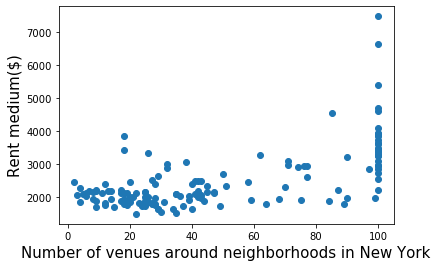

The correlation coefficient between number of venues and the rent medium is 0.6281447993326583


In [31]:
import matplotlib.pyplot as plt
plt.scatter(df['total'], df['mean'])
plt.xlabel('Number of venues around neighborhoods in New York',fontsize=15)
plt.ylabel('Rent medium($)',fontsize=15)
plt.show()
cor=np.corrcoef(df['total'], df['mean'])  
print('The correlation coefficient between number of venues and the rent medium is ' + str(cor[1,0]))

Check transportation and rent

In [32]:
df['Bus related']=df[['Bus Line','Bus Station','Bus Stop']].sum(axis=1)
df['Train related']=df[['Train','Train Station']].sum(axis=1)

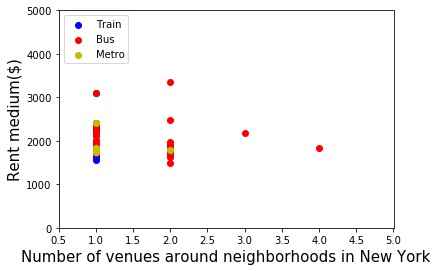

The correlation coefficient between number of train and the rent medium is -0.14255075066371023
The correlation coefficient between number of bus and the rent medium is -0.25756744939811876
The correlation coefficient between number of metro and the rent medium is -0.15999033961939751


In [33]:
plt.scatter(df['Train related'], df['mean'],c='b',label='Train')
plt.scatter(df['Bus related'], df['mean'],c='r',label='Bus')
plt.scatter(df['Metro Station'], df['mean'],c='y',label='Metro')
plt.xlabel('Number of venues around neighborhoods in New York',fontsize=15)
plt.ylabel('Rent medium($)',fontsize=15)
plt.legend(loc='upper left')
plt.xlim(0.5, 5)
plt.ylim(0, 5000)
plt.show()
cor=np.corrcoef(df['Train related'], df['mean'])  
print('The correlation coefficient between number of train and the rent medium is ' + str(cor[1,0]))
cor=np.corrcoef(df['Bus related'], df['mean'])  
print('The correlation coefficient between number of bus and the rent medium is ' + str(cor[1,0]))
cor=np.corrcoef(df['Metro Station'], df['mean'])  
print('The correlation coefficient between number of metro and the rent medium is ' + str(cor[1,0]))

In [34]:
temp=df[df['areaName']=='Central Park South'].T
print(temp.to_string())

                                                          23
Unnamed: 0                                                23
areaName                                  Central Park South
Borough                                            Manhattan
areaType                                        neighborhood
mean                                                 7481.83
Latitude                                             40.7646
Longitude                                           -73.9738
Neighborhood                              Central Park South
Zoo Exhibit                                                0
Accessories Store                                          1
African Restaurant                                         0
Airport Terminal                                           0
Airport Tram                                               0
American Restaurant                                        5
Amphitheater                                               0
Animal Shelter          

Check the most and least correlated variables with the rent price

In [35]:
a=list(range(8, 404))
a.append(4)
df2=df.iloc[:,a]
cor_coef=np.corrcoef(df2.T)[396,:][0:396]
#print(df2)


In [36]:
used=np.argsort(abs(cor_coef))#[-300:-1]
#print(used)
firstfive = pd.DataFrame()
firstfive=firstfive.assign(venue = df2.columns.values[used][-5:]) 
firstfive=firstfive.assign(corr = cor_coef[used][-5:]) 
firstfive
#print(df2.columns.values[used])
#print(cor_coef[used])


venue      corr
0          Men's Store  0.601330
1    French Restaurant  0.619175
2                Hotel  0.622876
3                total  0.628145
4  American Restaurant  0.630444

In [37]:
used=np.argsort(abs(cor_coef))#[-300:]
#print(used)
firstfive = pd.DataFrame()
firstfive=firstfive.assign(venue = df2.columns.values[used][0:5]) 
firstfive=firstfive.assign(corr = cor_coef[used][0:5]) 
firstfive
#print(df2.columns.values[used])
#print(cor_coef[used])


venue      corr
0  Egyptian Restaurant  0.000129
1            Cafeteria  0.000259
2              Library  0.000259
3     Arepa Restaurant  0.000328
4         Music School  0.000563

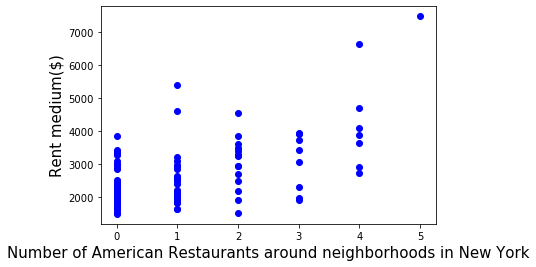

In [38]:
plt.scatter(df['American Restaurant'], df['mean'],c='b',label='Train')
plt.xlabel('Number of American Restaurants around neighborhoods in New York',fontsize=15)
plt.ylabel('Rent medium($)',fontsize=15)
plt.show()

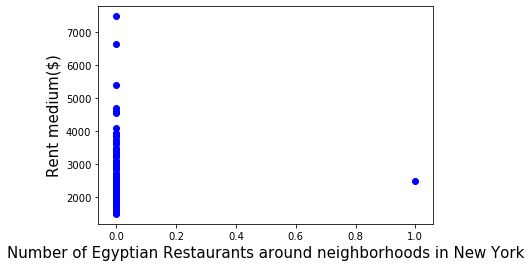

In [39]:
plt.scatter(df['Egyptian Restaurant'], df['mean'],c='b',label='Train')
plt.xlabel('Number of Egyptian Restaurants around neighborhoods in New York',fontsize=15)
plt.ylabel('Rent medium($)',fontsize=15)
plt.show()

build the multiple linear regression model.
Then retreive the coefficients for each venue to 
see whether increase the rent the most

     Coefficients                                     Venue  occurance
0        2.160948                       Egyptian Restaurant          1
1       13.631432                                 Cafeteria          1
2       14.144688                                   Library          1
3      -38.447011                          Arepa Restaurant          4
4       36.876438                              Music School          1
5       36.847062                                Bike Trail          1
6      -46.065947                                    Hostel          2
7      231.529131                                Campground          1
8      -45.187385                          Halal Restaurant          3
9       15.786728                                Comic Shop          2
10      -0.110550                              Amphitheater          1
11      -0.827188                     Outdoors & Recreation          3
12      27.236629                                      Lake          1
13    

(0, 6000)

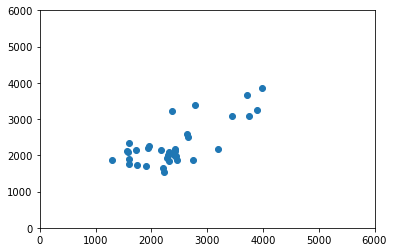

In [40]:
np.random.seed(10)
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train.iloc[:,used+8])
#x = np.asanyarray(train.iloc[:,8:])
y = np.asanyarray(train['mean'])
regr.fit (x, y)
# The coefficients

df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
                                  'Venue': list(train.iloc[:,used+8].columns), 
                                 'occurance': list(np.sign(df.iloc[:,used+8]).sum(axis=0))})
#df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
 #                                 'Venue': list(train.iloc[:,8:].columns) })

print (df_coeff)
y_hat= regr.predict(test.iloc[:,used+8])
x = np.asanyarray(test.iloc[:,used+8])
#y_hat= regr.predict(test.iloc[:,8:])
#x = np.asanyarray(test.iloc[:,8:])
y = np.asanyarray(test['mean'])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))
print(np.mean(abs(y_hat-y)))
plt.scatter(y_hat, y)
plt.xlim(0, 6000)
plt.ylim(0, 6000)


In [41]:
order=np.argsort(df_coeff['Coefficients'])
df_coeff.iloc[order,:]

Coefficients                                     Venue  occurance
355   -200.068553                   New American Restaurant         24
35    -172.828288                                Restaurant         42
57    -172.533675                        Athletics & Sports          9
19    -167.020336                                    Lounge         21
296   -165.284042                          Tapas Restaurant         12
66    -158.626325                        Turkish Restaurant          4
257   -152.604624                                    Market         16
67    -140.932372                                   Exhibit          2
301   -132.828339                                Food Truck         35
111   -130.406483                                Kids Store         16
126   -127.455361                                    Bistro          6
153   -107.998242                                Bagel Shop         46
231   -105.855725                              Intersection          7
387   -104.400712                                       Spa         35
315   -103.722179                                 Juice Bar         32
311   -102.989404                             Burrito Place          9
133   -101.200084                         Health Food Store          3
40    -100.559947                                     Trail          8
289    -98.209124                            Chocolate Shop          7
331    -97.038438                         Accessories Store          7
325    -96.535572                              Dessert Shop         31
254    -95.190334                                     Plaza         21
191    -93.686551                              Dance Studio         14
281    -92.958375                        Spanish Restaurant         39
190    -91.545062                             Moving Target          5
215    -89.876514              Theme Park Ride / Attraction          4
42     -88.074801                              Hockey Field          1
255    -88.035952                       Monument / Landmark          3
304    -84.850382                                   Theater         15
166    -84.238202                               Pizza Place        110
345    -83.216580                        Seafood Restaurant         41
371    -80.646844                              Cocktail Bar         35
197    -80.143569                     Check Cashing Service          3
86     -78.669306                       Dumpling Restaurant          7
237    -77.515226                              Noodle House          8
248    -77.127092                             Metro Station          8
329    -73.629333                            Ice Cream Shop         63
300    -71.004947                      Fast Food Restaurant         40
125    -70.176500                        Tibetan Restaurant          2
265    -70.055207                             Deli / Bodega         81
180    -69.955637                                  Bus Stop         11
116    -69.908478                      Cantonese Restaurant          3
14     -67.836595                   Fruit & Vegetable Store          5
73     -67.689170                                Eye Doctor          1
361    -67.163890                                Steakhouse         15
138    -66.763617                                 Surf Spot          1
71     -66.118751                                     Beach          4
182    -65.346416                           Thai Restaurant         33
316    -64.447188                               Supermarket         50
127    -64.309360                         Polish Restaurant          3
28     -64.195559                                Laundromat          4
81     -63.253644                        Frozen Yogurt Shop          7
33     -62.201534                              Skating Rink          1
34     -62.125232                          Baseball Stadium          1
59     -61.000533                         Hotpot Restaurant          5
36     -60.835928            

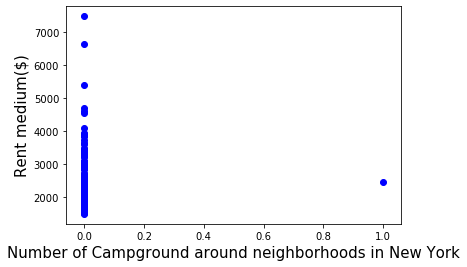

In [43]:
plt.scatter(df['Campground'], df['mean'],c='b',label='Train')
plt.xlabel('Number of Campground around neighborhoods in New York',fontsize=15)
plt.ylabel('Rent medium($)',fontsize=15)
plt.show()

Check the total number of venues in all neighborhoods

In [44]:
morethan4=np.where(np.sign(df.iloc[:,8:]).sum(axis=0)>10)[0]
np.sign(df.iloc[:,8:]).sum(axis=0)

Zoo Exhibit                                   1
Accessories Store                             7
African Restaurant                            4
Airport Terminal                              1
Airport Tram                                  1
American Restaurant                          58
Amphitheater                                  1
Animal Shelter                                1
Antique Shop                                  8
Arcade                                        1
Arepa Restaurant                              4
Argentinian Restaurant                        7
Art Gallery                                  30
Art Museum                                    6
Arts & Crafts Store                          16
Arts & Entertainment                          1
Asian Restaurant                             21
Athletics & Sports                            9
Auditorium                                    1
Australian Restaurant                         3
Austrian Restaurant                     

test the accuracy for different number of venue types including in the model. 
It turns out the more the better.

In [45]:
def differentvenue(morethan4):
 np.random.seed(10)
 msk = np.random.rand(len(df)) < 0.7
 train = df[msk]
 test = df[~msk]
 from sklearn import linear_model
 regr = linear_model.LinearRegression()
 x = np.asanyarray(train.iloc[:,morethan4+8])
#x = np.asanyarray(train.iloc[:,8:])
 y = np.asanyarray(train['mean'])
 regr.fit (x, y)
# The coefficients

 df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
                                  'Venue': list(train.iloc[:,morethan4+8].columns) })
#df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
 #                                 'Venue': list(train.iloc[:,8:].columns) })

 #print (df_coeff)
 y_hat= regr.predict(test.iloc[:,morethan4+8])
 x = np.asanyarray(test.iloc[:,morethan4+8])
#y_hat= regr.predict(test.iloc[:,8:])
#x = np.asanyarray(test.iloc[:,8:])
 y = np.asanyarray(test['mean'])
 #print("Residual sum of squares: %.2f"
     # % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
 print('Variance score: %.2f' % regr.score(x, y))
 return(np.mean(abs(y_hat-y)))
 plt.scatter(y_hat, y)
 plt.xlim(0, 6000)
 plt.ylim(0, 6000)
    

for n in [0,1,2,3,4,5,6,7,8,9,10]:
 morethan4=np.where(np.sign(df.iloc[:,8:]).sum(axis=0)>n)[0]  
 print(differentvenue(morethan4))


Variance score: 0.39
444.41378882294316
Variance score: 0.09
547.5715521622711
Variance score: -0.20
595.0568984159997
Variance score: -0.26
602.3301773683031
Variance score: -0.37
654.8205310501716
Variance score: -0.54
690.1853361096906
Variance score: -1.09
762.9145385384157
Variance score: -4.66
1140.9280566838077
Variance score: -7.78
1461.3047773009537
Variance score: -9.49
1522.1913164095492
Variance score: -16.38
2012.691066696416


let us try decision tree model. 
First install all related packages.

In [48]:
pip install pydotplus

     |████████████████████████████████| 286kB 1.4MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [49]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.40.1            |       h0dab3d1_0         6.8 MB  conda-forge
    libtool-2.4.6              |    h14c3975_1002         512 KB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    xorg-libxpm-3.5.12         |    h14c3975_1002          64 KB  conda-forge
    xorg-libxt-1.1.5           |    h516909a_1003         367 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.7 MB

The followin

Train the decision tree model

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

np.random.seed(10)
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]
x_all = np.asanyarray(df.iloc[:,used+8])
#enc = KBinsDiscretizer(n_bins=3, encode='onehot')
#X = enc.fit_transform(x_all)
x_all[(x_all >2)] = 2
x=x_all[msk]

from sklearn import linear_model
regr = linear_model.LinearRegression()
#x = np.asanyarray(train.iloc[:,used+8])
#x = np.asanyarray(train.iloc[:,8:])
y_all = np.asanyarray(df['mean'])
y=pd.qcut(y_all, 3, labels=False)
y_train=y[msk]
y_test=y[~msk]
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 100)
Tree.fit(x,y_train)
#df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
#                                 'Venue': list(train.iloc[:,used+8].columns) })
#df_coeff = pd.DataFrame.from_dict({'Coefficients': list(regr.coef_),
 #                                 'Venue': list(train.iloc[:,8:].columns) })
#x = np.asanyarray(test.iloc[:,used+8])
x=x_all[~msk]
predTree = Tree.predict(x)
result=pd.DataFrame.from_dict({'pred': predTree,'true': y_test})
print(result)
accuracy_score(predTree, y_test)


    pred  true
0      2     1
1      2     2
2      2     2
3      1     2
4      1     1
5      2     2
6      2     2
7      1     1
8      0     0
9      0     1
10     1     2
11     0     1
12     0     0
13     0     0
14     2     1
15     1     1
16     1     1
17     1     1
18     2     2
19     2     2
20     1     1
21     2     2
22     1     2
23     1     0
24     1     0
25     1     1
26     0     0
27     0     0
28     0     0
29     1     0
30     2     0
31     0     1
32     1     1
33     1     0
34     0     0
35     0     1


0.6111111111111112

Visualize the decision tree process

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


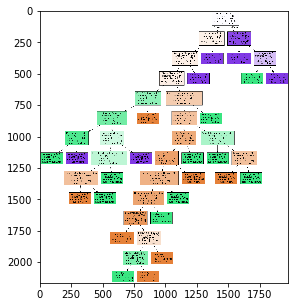

In [51]:

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[used+8]
targetNames = ['low','medium','high']
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= targetNames, filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(6, 5))
plt.imshow(img)